In [ ]:
from google.colab import files
upload = files.upload()

Saving Boston.csv to Boston.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,target
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


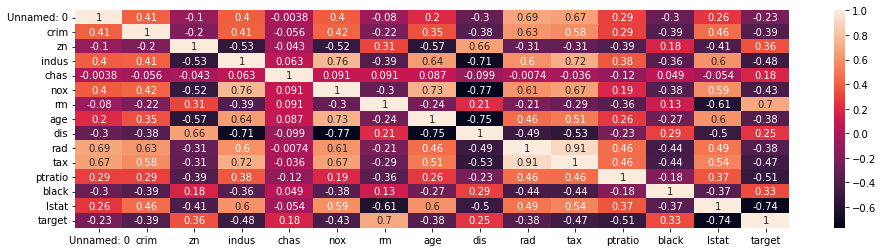

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
corr = sb.heatmap(df.corr(),annot=True)
corr

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['lstat']],df['target'],test_size=0.25,random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

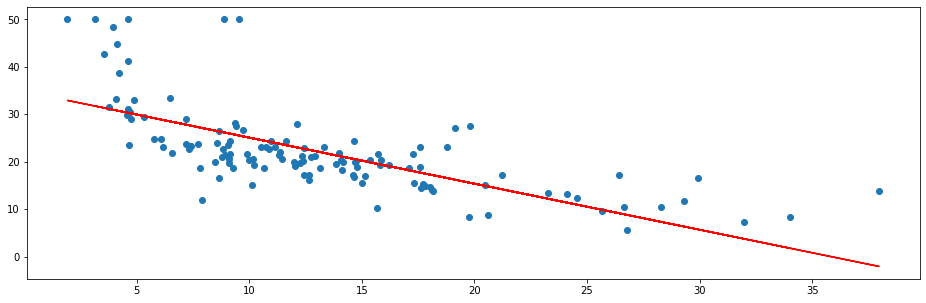

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,color='red')

In [ ]:
#Multiple Linear Regression
X_train,X_test,y_train,y_test = train_test_split(df[['crim',	'zn',	'indus'	,'chas',	'nox',	'rm',	'age',	'dis', 'rad','tax','ptratio',	'black']],df['target'],test_size=0.25,random_state=0)
lr1 = LinearRegression()

lr1.fit(X_train,y_train)
y_test_pred = lr1.predict(X_test)

In [ ]:
#Linear Regression
from sklearn.metrics import mean_squared_error,r2_score
print(f'Mean Squared Error: {round(mean_squared_error(y_test,y_test_pred),3)}')
print(f'R-Squared Score: {round(r2_score(y_test,y_test_pred),3)}')

Mean Squared Error: 37.298
R-Squared Score: 0.543


In [ ]:
#Multiple Linear Regression
print(f'Mean Squared Error: {round(mean_squared_error(y_test,y_test_pred),3)}')
print(f'R-Squared Score: {round(r2_score(y_test,y_test_pred),3)}')

Mean Squared Error: 37.298
R-Squared Score: 0.543


In [ ]:
import statsmodels.api as sm
beta_0 = sm.add_constant(X_train)
st_md = sm.OLS(y_train,beta_0).fit()
print(st_md.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const      21.444843
crim       -0.188745
zn          0.031670
indus      -0.055199
chas        2.603063
nox       -17.657316
rm          5.973995
age        -0.050430
dis        -1.400023
rad         0.246044
tax        -0.010763
ptratio    -1.104627
black       0.014465
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(st_md.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     79.36
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           5.21e-94
Time:                        18:22:47   Log-Likelihood:                -1137.5
No. Observations:                 379   AIC:                             2301.
Df Residuals:                     366   BIC:                             2352.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4448      5.915      3.625      0.0